In [2]:
import os
import glob
import pandas as pd
import subprocess

import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

#import qutip.testing

from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

from scipy.interpolate import interp1d

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_28208/1436335006.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
# importing data 

ds3 = np.genfromtxt('data-sets/data-set-3/data-set-3.csv', delimiter=',')

In [4]:
# cleaning up the data

ds3_mA = ds3[1:,0]

ds3_offset_1 = -0.007
ds3_V1 = ds3[86:114,1] - ds3_offset_1

ds3_offset_2 = -0.006
ds3_V2 = ds3[40:114,2] - ds3_offset_2

ds3_offset_3 = 0
ds3_V3 = ds3[31:98,3] - ds3_offset_3 

ds3_offset_4 = 0.065
ds3_V4 = ds3[1:45,4] - ds3_offset_4

ds3_V4_V3_factor = np.mean(ds3_V4[30:45]/np.mean(ds3_V3[0:14]))

ds3_V3_corrected = ds3_V3*ds3_V4_V3_factor

ds3_V3_V2_factor = np.mean(ds3_V3[9:67]/np.mean(ds3_V2[0:58]))

ds3_V2_corrected = ds3_V2 * ds3_V3_V2_factor * ds3_V4_V3_factor

ds3_V1_V2_factor = np.mean(ds3_V2[46:]/np.mean(ds3_V1))

ds3_V1_corrected = ds3_V1 * ds3_V1_V2_factor * ds3_V3_V2_factor * ds3_V4_V3_factor

ds3_V = np.concatenate((ds3_V1, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

In [5]:
# final data for plotting

ds3_mA_4 = ds3_mA[1:45]
ds3_V4 

ds3_mA_3 = ds3_mA[30:97]
ds3_V3_corrected

ds3_mA_2 = ds3_mA[39:114]
ds3_V2_corrected

ds3_mA_1 = ds3_mA[85:114]
ds3_V1_corrected

ds3_mA_final = np.concatenate((ds3_mA_4, ds3_mA_3, ds3_mA_2, ds3_mA_1))
ds3_V_final = np.concatenate((ds3_V4, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

No handles with labels found to put in legend.


Text(0, 0.5, 'Detector (V)')

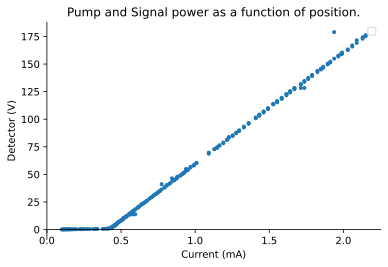

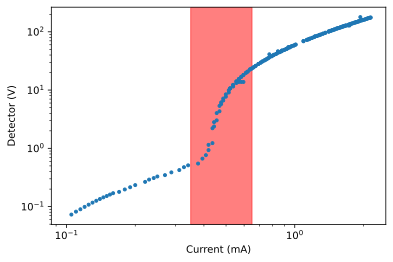

In [6]:
# plotting routine

plt.figure()
plt.plot(ds3_mA_final, ds3_V_final,'.')
plt.title("Pump and Signal power as a function of position.", loc = 'center')
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
plt.ylabel("Detector (V)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.figure()
plt.plot(ds3_mA_final, ds3_V_final,'.')
plt.axvspan(0.35, 0.65, color='red', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Current (mA)")
plt.ylabel("Detector (V)")


100.78762149163131 -40.39508732499735
threshold= 0.40079413252500923


Text(0, 0.5, 'Detector Signal  (V)')

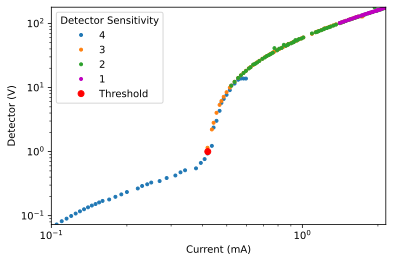

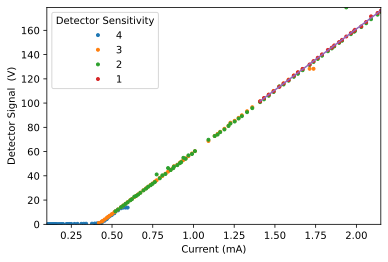

In [7]:
# plot with diff sensitivities

ds3_mA_4 = ds3_mA[1:45]
ds3_V4 

ds3_mA_3 = ds3_mA[30:97]
ds3_V3_corrected

ds3_mA_2 = ds3_mA[39:114]
ds3_V2_corrected

ds3_mA_1 = ds3_mA[85:114]
ds3_V1_corrected

ds3_mA_final = np.concatenate((ds3_mA_4, ds3_mA_3, ds3_mA_2, ds3_mA_1))
ds3_V_final = np.concatenate((ds3_V4, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

plt.figure()
plt.margins(x=0,y=0)
plt.plot(ds3_mA_4, ds3_V4,'.')
plt.plot(ds3_mA_3, ds3_V3_corrected,'.')
plt.plot(ds3_mA_2, ds3_V2_corrected,'.')
plt.plot(ds3_mA_1, ds3_V1_corrected,'m.')
plt.plot(0.42, 1, 'ro')
plt.legend(['4','3','2','1','Threshold'], title="Detector Sensitivity")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Current (mA)")
plt.ylabel("Detector (V)")

m_3, b_3 = np.polyfit(ds3_mA_1, ds3_V1_corrected,1)
print(m_3,b_3)
print('threshold=',-b_3/m_3)

plt.figure()
plt.margins(x=0,y=0)
plt.plot(ds3_mA_4, ds3_V4,'.')
plt.plot(ds3_mA_3, ds3_V3_corrected,'.')
plt.plot(ds3_mA_2, ds3_V2_corrected,'.')
plt.plot(ds3_mA_1, ds3_V1_corrected,'.')
plt.plot(ds3_mA_1,m_3*ds3_mA_1+b_3,'-')
plt.legend(['4','3','2','1'], title="Detector Sensitivity")
plt.xlabel("Current (mA)")
plt.ylabel("Detector Signal  (V)")

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_28208/518802816.py:22: RuntimeWarning: divide by zero encountered in log
  m_1, b_1 = np.polyfit(np.log(ds3_mA_4),np.log(ds3_V4),1)


Text(0, 0.5, 'Detector (V)')

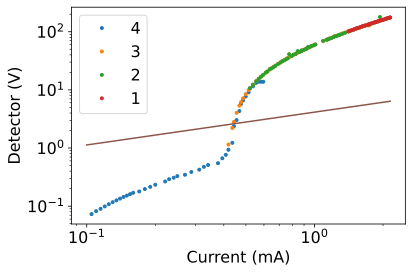

In [17]:
# testing different variation of above stuff 

# plot with diff sensitivities

ds3_mA_4 = ds3_mA[1:45]
ds3_V4 

ds3_mA_3 = ds3_mA[30:97]
ds3_V3_corrected

ds3_mA_2 = ds3_mA[39:114]
ds3_V2_corrected

ds3_mA_1 = ds3_mA[85:114]
ds3_V1_corrected

ds3_mA_final = np.concatenate((ds3_mA_4, ds3_mA_3, ds3_mA_2, ds3_mA_1))
ds3_V_final = np.concatenate((ds3_V4, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

i = 2
l = 46
m_1, b_1 = np.polyfit(np.log(ds3_mA_4),np.log(ds3_V4),1)
m_2, b_2 = np.polyfit(np.log(ds3_mA_final[173:213]),np.log(ds3_V_final[173:213]),1)

m_10, b_10 = np.polyfit(np.log(ds3_mA_1), np.log(ds3_V1_corrected),1)

#print('slopes : ',m_1,m_2)
#print('y coeff : ',b_1,b_2)

y_vals = np.exp(m_1*(np.log10(ds3_mA_final))+np.log10(b_1)+4.05)
y_vals_b = np.exp(m_2*(np.log10(ds3_mA_final))+np.log10(b_2)+0.8)

#m_3, b_3 = np.polyfit(ds4_mA_final[60:],ds4_V_final[5:],1)

plt.figure()
plt.plot(ds3_mA_4, ds3_V4,'.')
plt.plot(ds3_mA_3, ds3_V3_corrected,'.')
plt.plot(ds3_mA_2, ds3_V2_corrected,'.')
plt.plot(ds3_mA_1, ds3_V1_corrected,'.')
plt.plot(ds3_mA_final,y_vals)
plt.plot(ds3_mA_final,y_vals_b)
plt.legend(['4','3','2','1'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Current (mA)")
plt.ylabel("Detector (V)")

#print(m)


In [9]:
# Calculation of Beta

#ds3_F =  
#ds3_aperture = np.pi*

#solid_angle = 

#def beta(F,theta_c):
#    return F*(4*np.pi/theta_c)

#ds3_beta = beta()

slope 0.559296257722442
69


"\nax.spines['right'].set_color('none')\nax.spines['top'].set_color('none')\nax.xaxis.set_ticks_position('bottom')\nax.spines['bottom'].set_position(('data', 0))\nax.yaxis.set_ticks_position('left')\nax.spines['left'].set_position(('data', 0))\n"

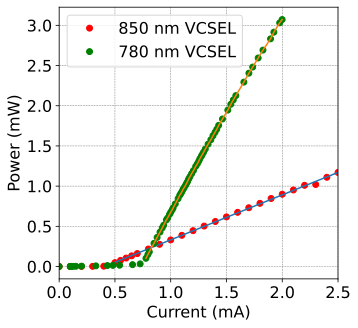

In [10]:
# L I Curve

ds4 = np.genfromtxt('data-sets/data-set-4/data-set-4.csv', delimiter=',')

ds4_mA = ds4[1:,0]
ds4_W = ds4[1:,1]*1000

m_5, b_5 = np.polyfit(ds4_mA[5:],ds4_W[5:],1)

print('slope',m_5)

# data for 780 nm VCSEL

laser_power_mA = np.array([0,0.099,0.1,0.11,0.125,0.15,0.201,0.329,0.432,0.482,0.542,0.658,0.726,0.778,
                        0.795,0.808,0.850,0.878,0.904,0.924,0.937,0.961,0.972,0.989,1.00,1.013,1.022,
                        1.041,1.066,1.081,1.091,1.101,1.111,1.120,1.132,1.141,1.151,1.160,1.172,1.188,
                        1.204,1.224,1.239,1.252,1.262,1.275,1.283,1.295,1.310,1.335,1.360,1.379,1.397,
                        1.413,1.430,1.464,1.512,1.539,1.561,1.584,1.656,1.701,1.735,1.784,1.827,1.895,
                        1.925,1.977,1.999])

print(len(laser_power_mA))

offset = 0.384

detector_mV = np.array([0.384,0.385,0.385,0.386,0.386,0.387,0.388,0.392,0.396,0.398,0.4,0.407,0.417,0.486,0.532,
                        0.566,0.672,0.746,0.812,0.864,0.898,0.963,0.987,1.031,1.059,1.089,1.114,1.163,1.228,
                        1.270,1.292,1.316,1.345,1.365,1.392,1.416,1.440,1.470,1.500,1.540,1.578,1.630,1.662,
                        1.696,1.726,1.758,1.777,1.807,1.845,1.906,1.961,2.011,2.053,2.092,2.140,2.219,2.330,
                        2.402,2.456,2.51,2.678,2.789,2.865,2.978,3.076,3.216,3.299,3.415,3.456])


ip_ds_1 = interp1d(laser_power_mA, detector_mV - offset, kind='cubic')

import matplotlib
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(5,5))
plt.plot(ds4_mA,ds4_W,'ro', label = '850 nm VCSEL')
plt.plot(ds4_mA[5:],(m_5*ds4_mA[5:])+b_5)
plt.plot(laser_power_mA,detector_mV-offset,'go', label = '780 nm VCSEL')
plt.plot(laser_power_mA[13:],ip_ds_1(laser_power_mA[13:]))

plt.margins(x=0)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

#plt.title("Absolute emission power of laser against supplied peak current.", loc = 'center')
plt.legend(loc="upper left")
plt.xlabel("Current (mA)")
plt.ylabel("Power (mW)")
ax = plt.gca()
'''
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
'''

#plt.savefig('4-r1-1', dpi=600)

In [11]:
print('Threshold :',-b_5/m_5)

print(m_5, b_5)

Threshold : 0.40648035310106745
0.559296257722442 -0.22734294032712382


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_edgecolor('black')
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()